In [1]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
plt.ion()
import seaborn
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict

# Load the data

In [2]:
coffee_ratings = pd.read_csv('arabica_data_cleaned.csv')
coffee_ratings.head()

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


## Select columns for modeling
We will seelct columns to use for modeling. Here it is a mixture of categorical and numerical variables. Rows with nan's will also be dropped leaving us with about 994 rows to use for modeling.

In [3]:
coffee_df = coffee_ratings[['total_cup_points',
                            'country_of_origin',
                            'variety',
                            'aroma',
                            'aftertaste',
                            'acidity',
                            'body',
                            'balance',
                            'sweetness',
                            'altitude_mean_meters']]
coffee_df = coffee_df.dropna()
coffee_df

,total_cup_points,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters
2,89.92,Ethiopia,Other,8.75,8.50,8.58,8.42,8.42,10.00,2075.00
3,89.75,Guatemala,Bourbon,8.42,8.42,8.42,8.33,8.42,10.00,1700.00
5,88.83,Ethiopia,Other,8.25,8.25,8.50,8.42,8.33,10.00,2075.00
10,88.25,Ethiopia,Other,8.08,8.50,8.50,7.67,8.42,10.00,1822.50
12,87.92,United States,Other,8.25,8.17,8.33,8.08,8.17,10.00,1872.00
...,...,...,...,...,...,...,...,...,...,...
1307,68.33,Mexico,Bourbon,7.08,6.25,7.42,7.25,6.75,10.00,900.00
1308,67.92,Haiti,Typica,6.75,6.42,6.67,7.08,6.67,6.00,350.00
1309,63.08,Nicaragua,Caturra,7.25,6.33,6.25,6.42,6.08,6.00,1100.00
1310,59.83,Guatemala,Catuai,7.50,6.67,7.67,7.33,6.67,1.33,1417.32


Categorical columns like country of origin, and variety need to be converted from categorical typies to numerical values for modeling.

In [4]:
# coffee_df["species"]
ord_enc = OrdinalEncoder()
coffee_df["country_of_origin"] = ord_enc.fit_transform(coffee_df[["country_of_origin"]])
coffee_df["variety"] = ord_enc.fit_transform(coffee_df[["variety"]])
country_of_origin = coffee_df.country_of_origin.unique()
variety = coffee_df.variety.unique()
variety

array([14.,  2.,  3.,  7.,  5., 20., 24., 22., 27., 21.,  8.,  4., 15.,
       25., 26., 13.,  9., 18., 16., 10., 19.,  6., 12.,  0., 23.,  1.,
       11., 17.])

In [5]:
country_of_origin

array([ 6.,  7., 26.,  2.,  4., 15.,  0., 25.,  9., 22., 12., 24.,  3.,
       18.,  5., 10., 23., 11., 17., 27.,  8.,  1., 28., 20., 21., 14.,
       13., 29., 16., 19.])

# View the relation between the variables
With a pairplot we can see the marginal and join distributions of the features with which we are working.

Features like aroma, aftertaste, acidity, body, and balance exist in a fairly narrow range amongst variables like variety and country of origin. Interestingly the country of origin and variaty seem to have no strong relation with each other whatsoever. Furthermore, most of the coffees in this dataset appear to be grown at fairly low altitudes. Overall, there doesn't seem to be any strong correlations between the features.

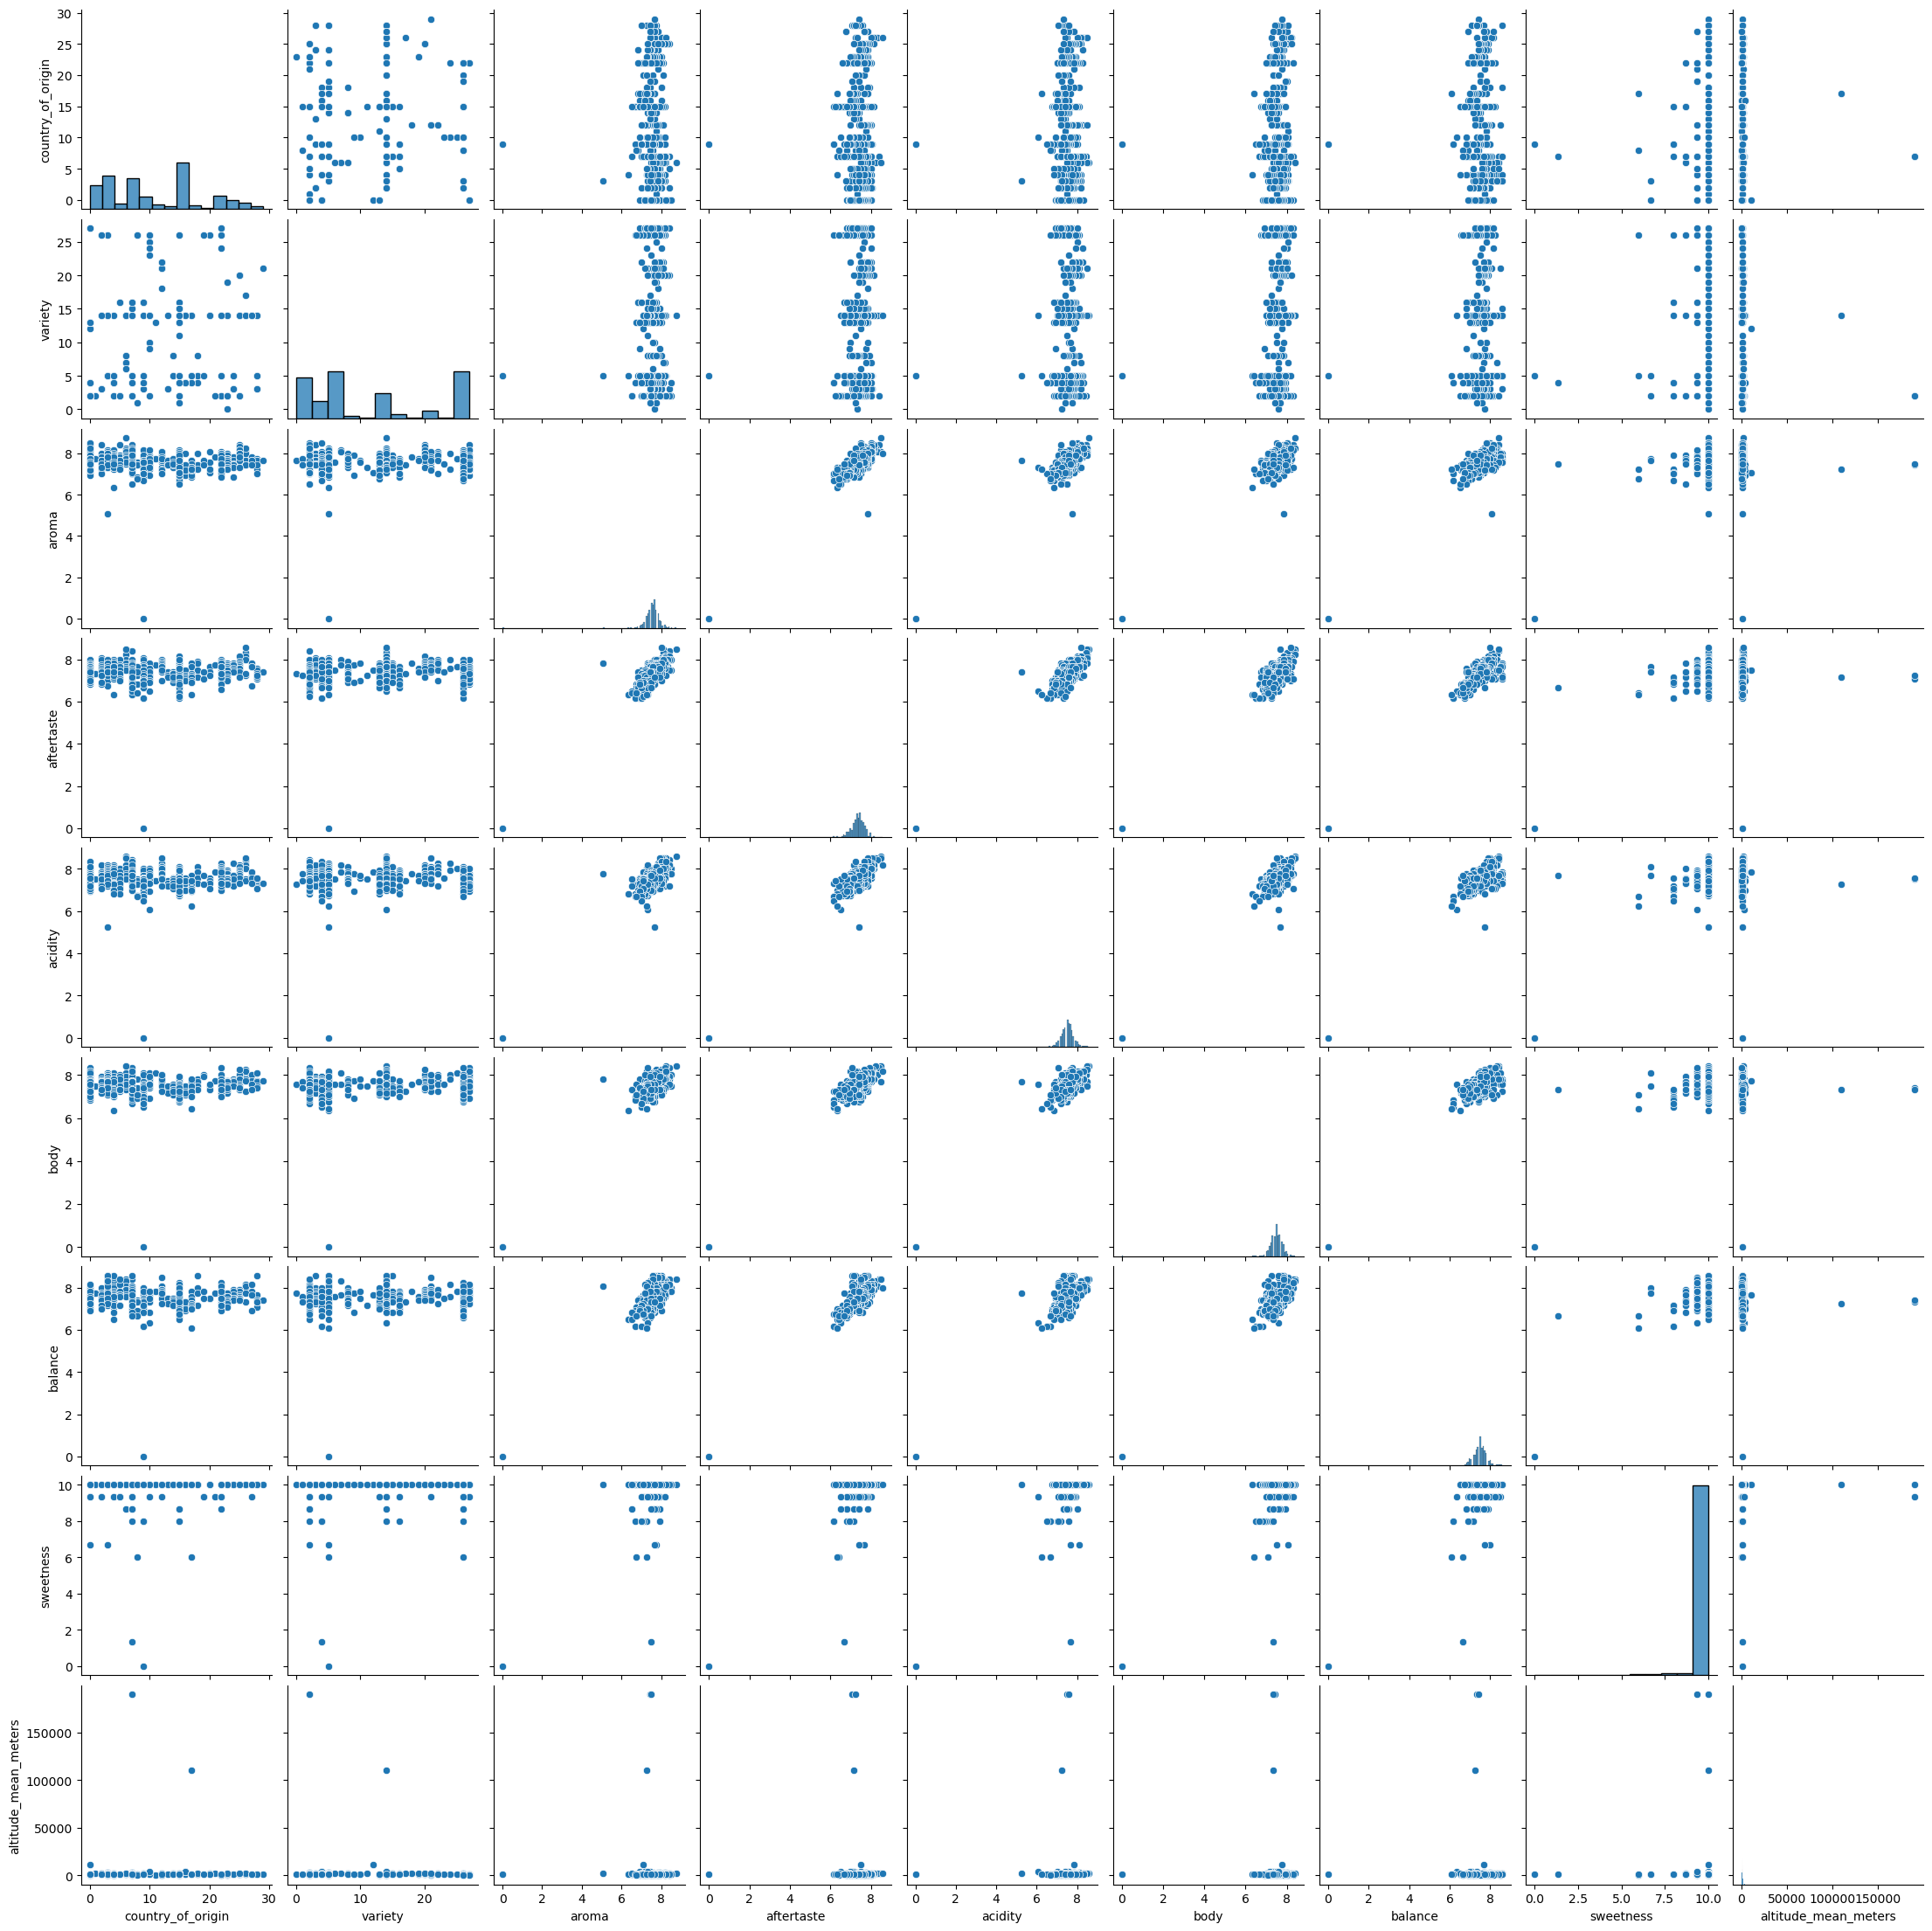

In [6]:
seaborn.pairplot(coffee_df.drop('total_cup_points', axis = 1)) 

It appears there are singular values for which some of the features are 0. We will remove these for modeling then replot the data.

In [7]:
coffee_df = coffee_df[coffee_df['aroma']>0]
coffee_df = coffee_df[coffee_df['acidity']>0]
coffee_df = coffee_df[coffee_df['aftertaste']>0]
coffee_df = coffee_df[coffee_df['body']>0]
coffee_df = coffee_df[coffee_df['balance']>0]
coffee_df = coffee_df[coffee_df['sweetness']>0]

The relations between the features appear more prominent. The features from aroma to balance appear to have a positive correlation amongst each other.

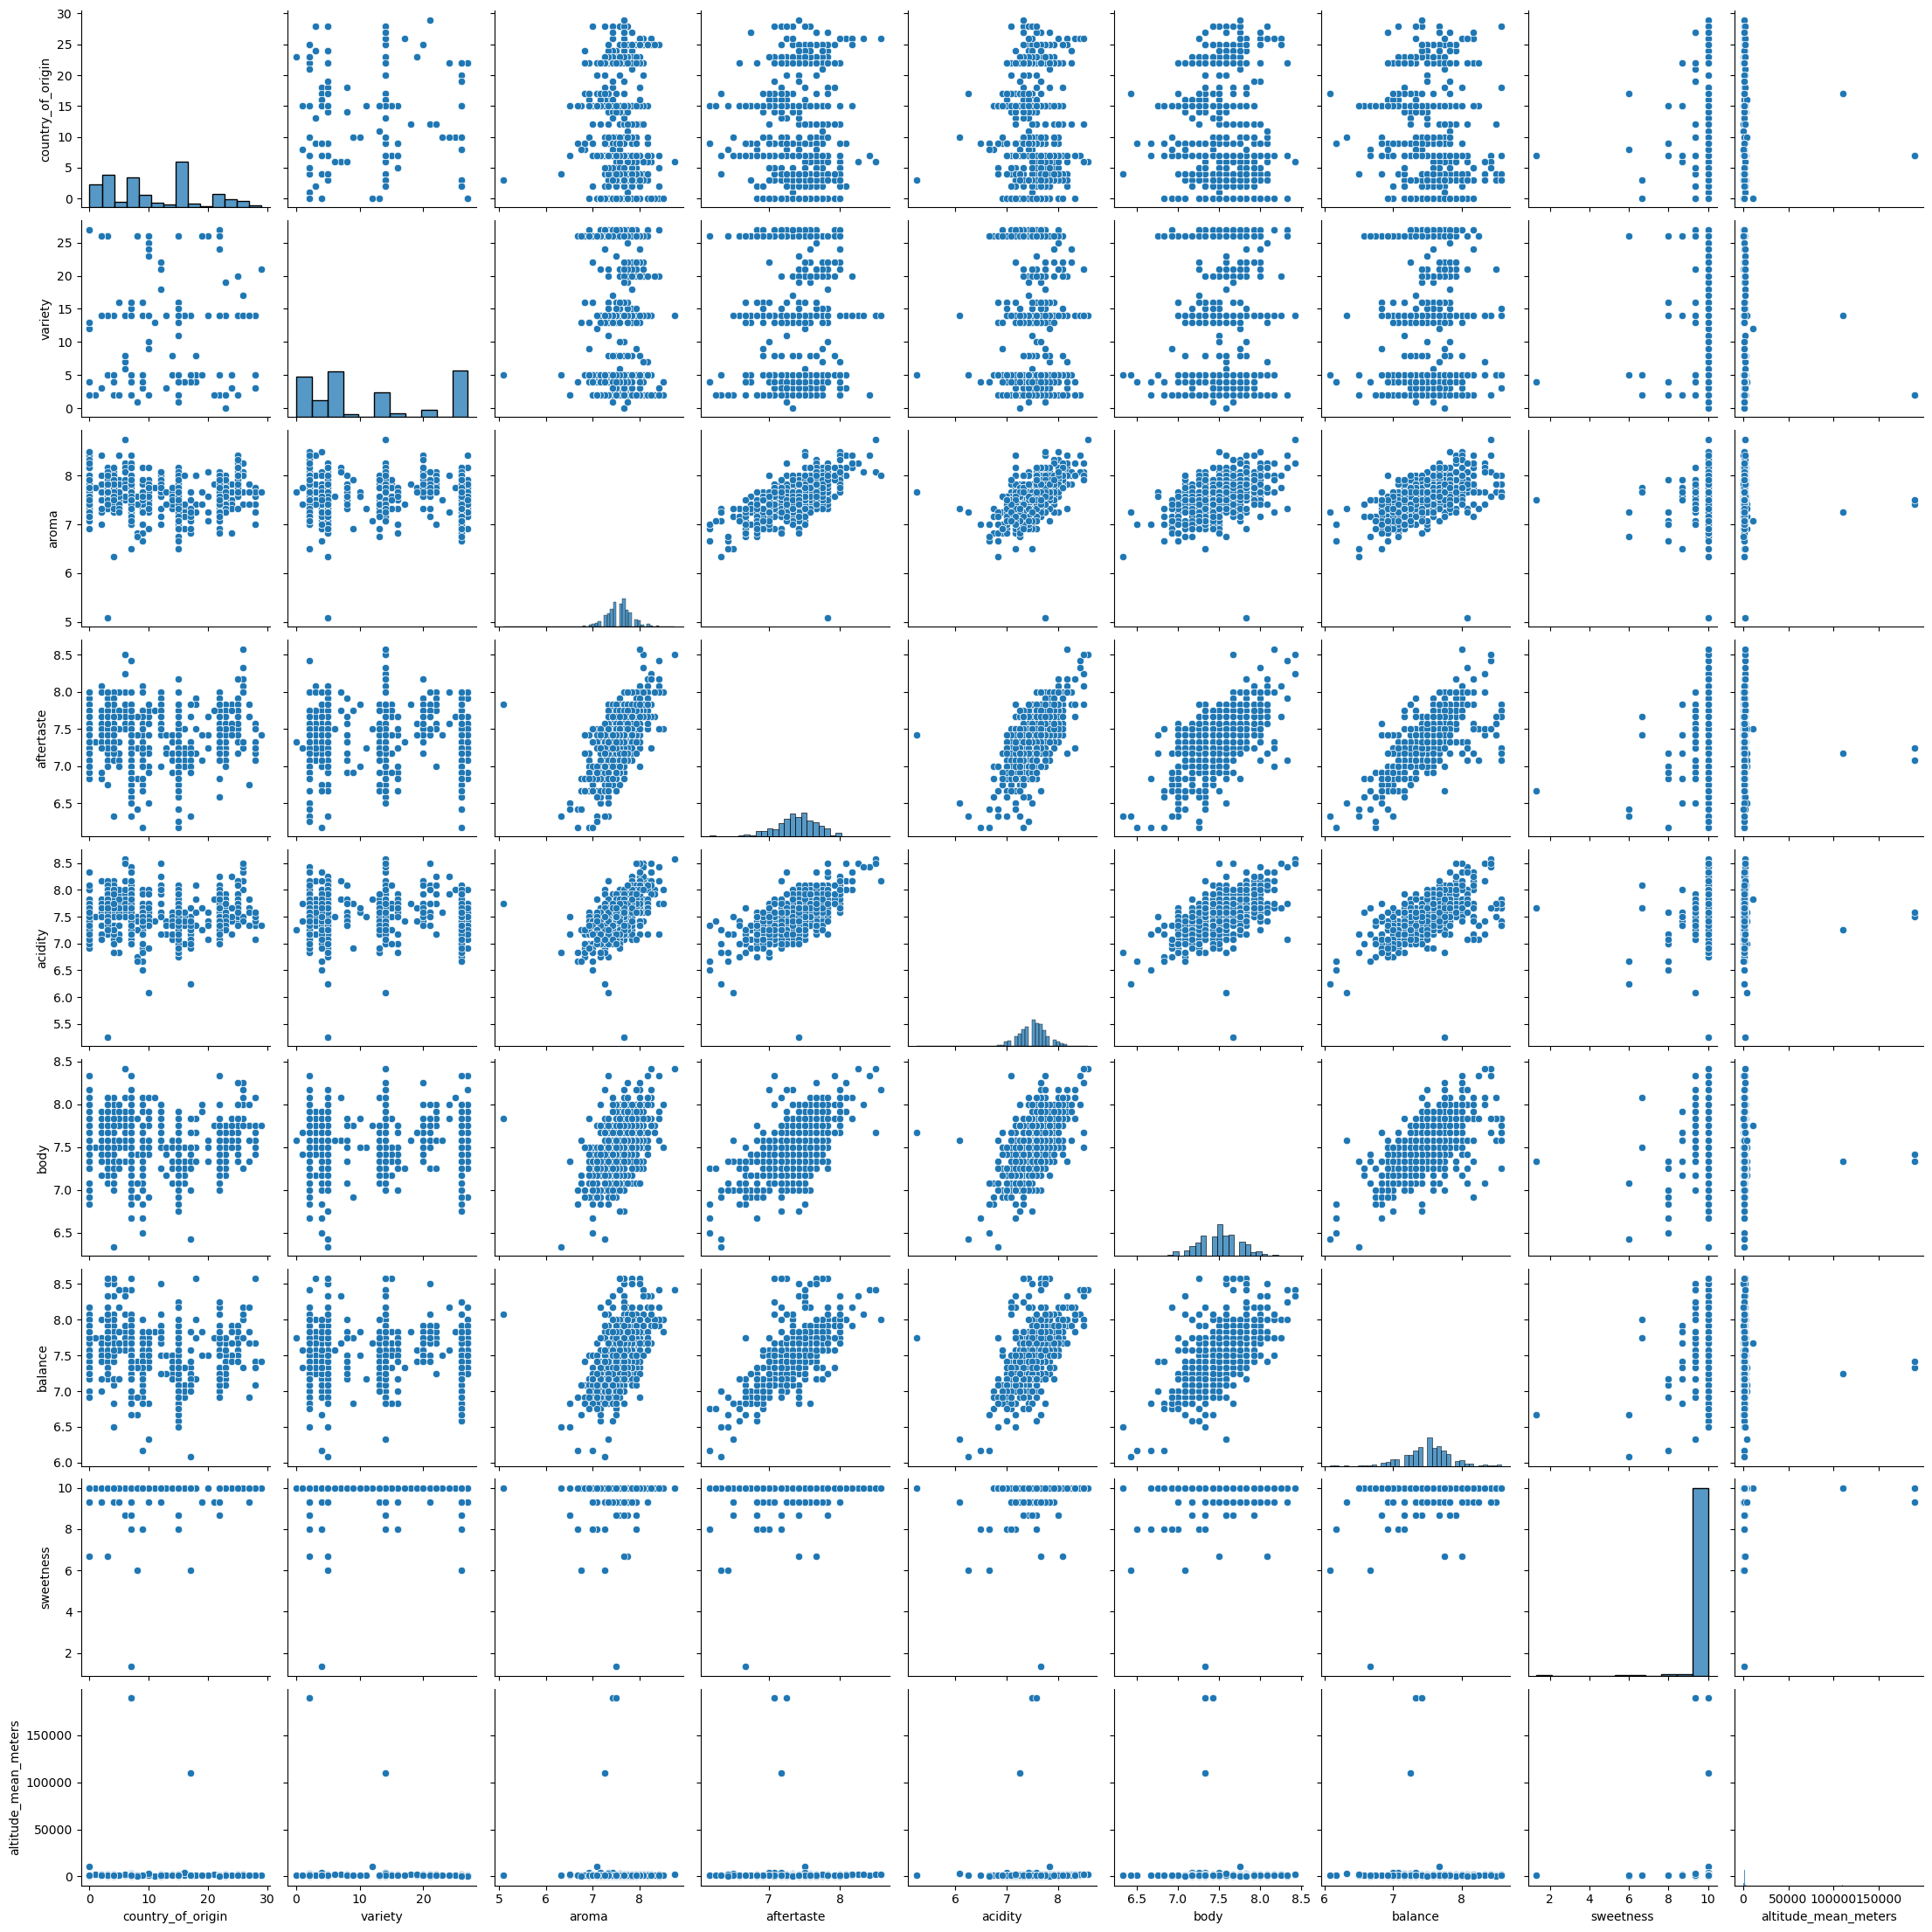

In [8]:
seaborn.pairplot(coffee_df.drop('total_cup_points', axis = 1)) 

We can also construct a correlation matrix from the dataframe to view the correlations between the features.

The features from aroma to balance appear to have a strong positive correlation with the total cup points. Features from aroma to balance appear to have strong positive correlations amonst themselves. Furthermore, the categorical variables appear to be negatively correlated with each other and the total cupping points. Interestingly there is a strong negetive correlation of column country_of_origin and variety with columns from balance to aroma. There is no linear relation between altitude mean meters and other features

<AxesSubplot:>

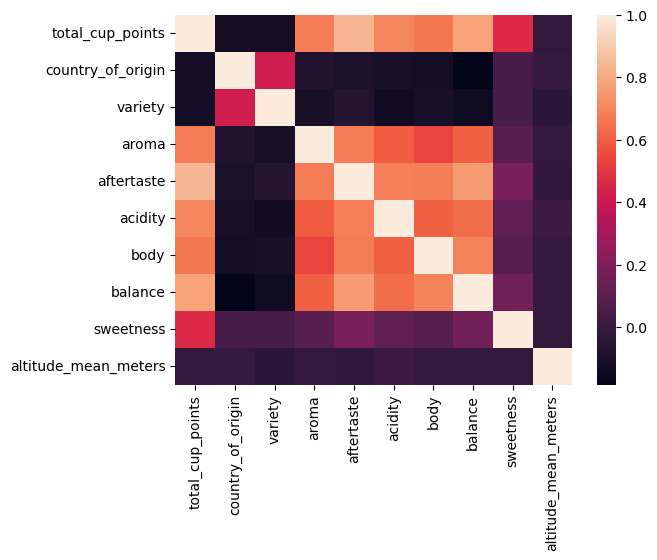

In [9]:
seaborn.heatmap(coffee_df.corr(),
                xticklabels=coffee_df.columns,
                yticklabels=coffee_df.columns)

Let us determine the number of unique scores in this dataset. There appears to be 149. I will reduce this to three to split the ratings into: Do Not Drink, Bad ,Decent, Good, Amazing.

In [10]:
len(coffee_df['total_cup_points'].unique())

149

Let's also view the distribution of the results to determine cutoffs for the three categories.

Text(0, 0.5, 'Count')

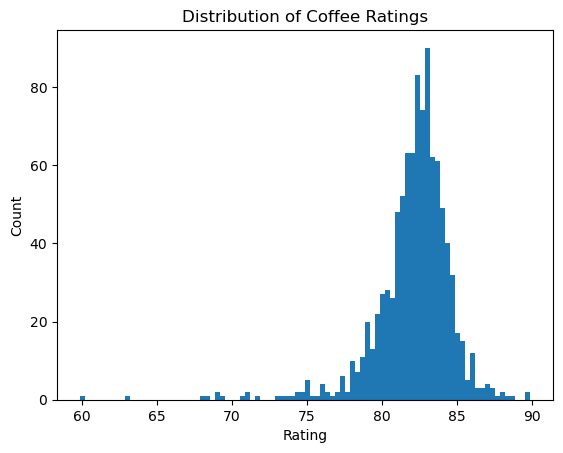

In [11]:
plt.hist(coffee_df['total_cup_points'], bins = 90)
plt.title("Distribution of Coffee Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

In [12]:
rating_pctile = np.percentile(coffee_df['total_cup_points'], [20, 40, 60, 80])
rating_pctile

array([80.75, 82.  , 82.92, 83.83])

## Create new column to create new assignments to the ratings
Do not Drink(0-20) will be labeled as 1, Bad(20-40) labeled as 2, Decent(40-60) will be labeled as 3, Good(60-80) will be labeled as 4 and Amazing(8--100) will be labeled as 5.

In [67]:
coffee_df['n_rating'] = 0
coffee_df['n_rating'] = np.where(coffee_df['total_cup_points'] < rating_pctile[0], 1, coffee_df['n_rating'])
coffee_df['n_rating'] = np.where((coffee_df['total_cup_points'] >= rating_pctile[0]) & (coffee_df['total_cup_points'] <= rating_pctile[1]), 2, coffee_df['n_rating'])
coffee_df['n_rating'] = np.where((coffee_df['total_cup_points'] >= rating_pctile[1]) & (coffee_df['total_cup_points'] <= rating_pctile[2]), 3, coffee_df['n_rating'])
coffee_df['n_rating'] = np.where((coffee_df['total_cup_points'] > rating_pctile[2]) & (coffee_df['total_cup_points'] <= rating_pctile[3]), 4, coffee_df['n_rating'])
coffee_df['n_rating'] = np.where(coffee_df['total_cup_points'] > rating_pctile[3], 5, coffee_df['n_rating'])
coffee_df.n_rating.unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [68]:
coffee_df

,total_cup_points,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,n_rating
2,89.92,6.0,14.0,8.75,8.50,8.58,8.42,8.42,10.00,2075.00,5
3,89.75,7.0,2.0,8.42,8.42,8.42,8.33,8.42,10.00,1700.00,5
5,88.83,6.0,14.0,8.25,8.25,8.50,8.42,8.33,10.00,2075.00,5
10,88.25,6.0,14.0,8.08,8.50,8.50,7.67,8.42,10.00,1822.50,5
12,87.92,26.0,14.0,8.25,8.17,8.33,8.08,8.17,10.00,1872.00,5
...,...,...,...,...,...,...,...,...,...,...,...
1306,69.17,9.0,4.0,7.00,6.17,6.50,6.67,6.17,8.00,1450.00,1
1307,68.33,15.0,2.0,7.08,6.25,7.42,7.25,6.75,10.00,900.00,1
1308,67.92,8.0,26.0,6.75,6.42,6.67,7.08,6.67,6.00,350.00,1
1309,63.08,17.0,5.0,7.25,6.33,6.25,6.42,6.08,6.00,1100.00,1


## View distribution of n_rating

(array([192.,   0., 193.,   0.,   0., 227.,   0., 191.,   0., 190.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

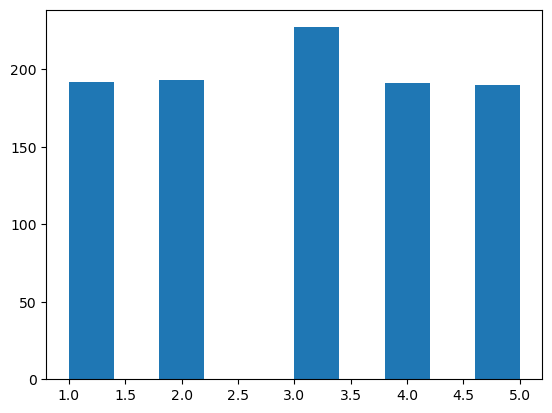

In [69]:
plt.hist(coffee_df['n_rating'])

In [70]:
coffee_df.drop(['total_cup_points', 'n_rating'], axis = 1)

,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters
2,6.0,14.0,8.75,8.50,8.58,8.42,8.42,10.00,2075.00
3,7.0,2.0,8.42,8.42,8.42,8.33,8.42,10.00,1700.00
5,6.0,14.0,8.25,8.25,8.50,8.42,8.33,10.00,2075.00
10,6.0,14.0,8.08,8.50,8.50,7.67,8.42,10.00,1822.50
12,26.0,14.0,8.25,8.17,8.33,8.08,8.17,10.00,1872.00
...,...,...,...,...,...,...,...,...,...
1306,9.0,4.0,7.00,6.17,6.50,6.67,6.17,8.00,1450.00
1307,15.0,2.0,7.08,6.25,7.42,7.25,6.75,10.00,900.00
1308,8.0,26.0,6.75,6.42,6.67,7.08,6.67,6.00,350.00
1309,17.0,5.0,7.25,6.33,6.25,6.42,6.08,6.00,1100.00


# Split the data into training and testing sets

In [71]:
X = coffee_df.drop(['total_cup_points', 'n_rating', 'variety', 'country_of_origin'], axis = 1)
y = coffee_df['n_rating']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .25, random_state = 42)

## Normalize the features

In [72]:
# Normalize the data
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(training), columns = X.columns)
normed_test_data = pd.DataFrame(sc.fit_transform(testing), columns = X.columns)

### Visualize Normalized Train Data

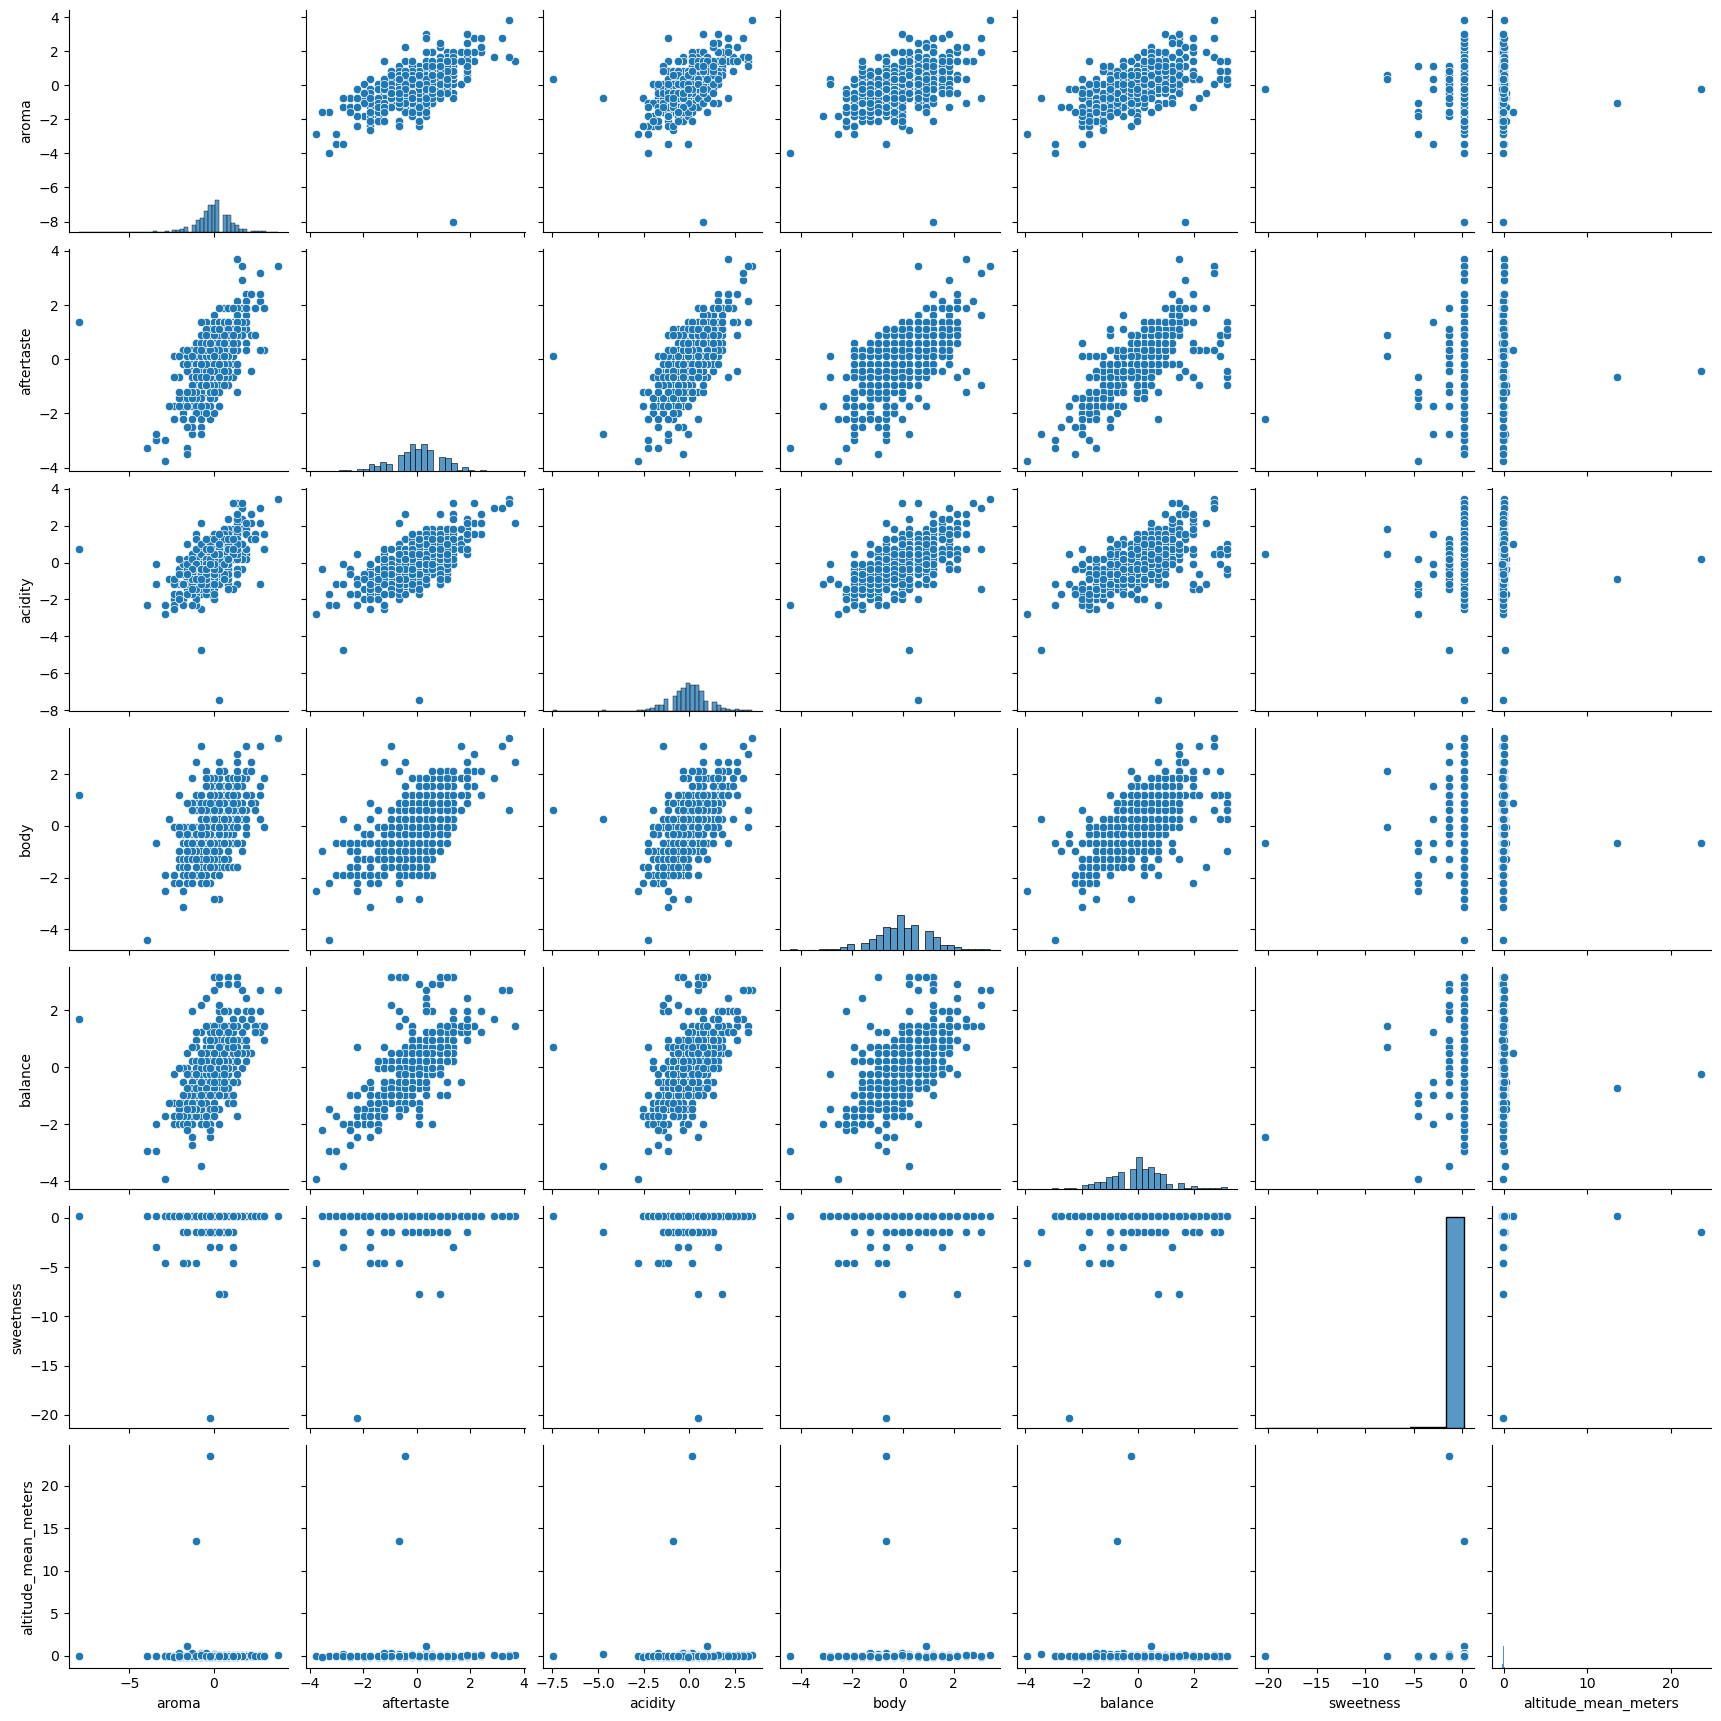

In [73]:
seaborn.pairplot(normed_train_data) 

# Random Forest Classifier

In [74]:
clf=RandomForestClassifier()
clf.fit(training, training_labels)

RandomForestClassifier()

In [75]:
preds = clf.predict(testing)

We can see this model scores 100% accuracy training labels and 80.72% accuracy on testing labels.

In [76]:
print (clf.score(training, training_labels))
print(clf.score(testing, testing_labels))

1.0
0.7951807228915663


# Finding important features from random forest

We can see that balance, aftertaste and acidity heavily contribute towards total_cup_points.

In [77]:
pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)

,0
balance,0.224054
aftertaste,0.212233
acidity,0.170735
aroma,0.138000
body,0.124829
altitude_mean_meters,0.106459
sweetness,0.023690


## Evaluating Results
The first column represents the coffees with a ‘Do not Drink’ rating, the second column represents the coffees with an ‘Bad’ rating, the third column represents the coffee with a ‘Decent’ rating, the fourth column represents the coffee with a ‘Good’ rating and the fifth column represents the coffee with a ‘Amazing’ rating. The numbers on the diagonal of the matrix, 41, 30, 43, 46 and 38 represent the number of coffees the model has accurately classified. The off diagonal values represent the misclassidied data. For example, 9 coffees which were supposed to be marked as ‘Bad’ scoring coffees were marked ‘Decent’.

In [79]:
metrics.confusion_matrix(testing_labels, preds,  labels = [1, 2, 3, 4, 5])

array([[41, 10,  0,  0,  0],
       [ 4, 30,  5,  0,  0],
       [ 1,  9, 43,  4,  1],
       [ 0,  0,  9, 46,  4],
       [ 0,  0,  0,  4, 38]], dtype=int64)

# Optimizing the random forest

In [80]:
# Number of trees in random forest
# n_estimators = np.linspace(100, 3000, int((3000-100)/50) + 1, dtype=int)
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]

# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1.0, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']


random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

random_grid

{'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
        2378, 2585, 2792, 3000]),
 'max_depth': [1, 5, 10, 20, 50, 75, 100, 150, 200],
 'min_samples_split': [1.0, 2, 5, 10, 15, 20, 30],
 'min_samples_leaf': [1, 2, 3, 4],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

### Random Grid Search the parameter space defined above

In [81]:
import time

In [82]:
t1 = time.time()
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)

rf_random.fit(training, training_labels)
t2 = time.time()

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [83]:
print ("It took %s to run"%(str((t2-t1)/60)))

It took 1.7367312828699748 to run


In [84]:
# Best Parameters
rf_random.best_params_

{'n_estimators': 1135,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': True}

# Fine tune using the results from random grid search as a starting point
Use grid search

In [30]:
param_grid = {
    'n_estimators': np.linspace(850, 950, 10, dtype = int),
    'max_depth': [46, 48, 50, 52, 54],
    'min_samples_split': [13, 14, 15, 16, 17],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

In [31]:
t3 = time.time()
# Base model
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = True)
# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 5, n_jobs = 8, verbose = 2)
grid_rf_search.fit(training, training_labels)
t4 = time.time()

Fitting 5 folds for each of 1250 candidates, totalling 6250 fits


In [32]:
best_rf_grid = grid_rf_search.best_estimator_
best_rf_grid

RandomForestClassifier(criterion='entropy', max_depth=48, min_samples_leaf=3,
                       min_samples_split=14, n_estimators=916)

In [33]:
print ("It took %s to run"%(str((t4-t3)/60)))

It took 25.629748690128327 to run


In [34]:
# Best Parameters
grid_rf_search.best_params_

{'max_depth': 48,
 'min_samples_leaf': 3,
 'min_samples_split': 14,
 'n_estimators': 916}

In [35]:
grid_preds = grid_rf_search.predict(testing)

We can see that grid search was not effective in increasing the classifier's accuracy

In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(testing_labels, grid_preds))

Accuracy: 0.7791164658634538


In [37]:
# Feature Importance
pd.DataFrame(best_rf_grid.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)

,0
balance,0.271109
aftertaste,0.249031
acidity,0.164821
aroma,0.115768
body,0.103853
altitude_mean_meters,0.035004
country_of_origin,0.023806
variety,0.023065
sweetness,0.013543


The first column represents the coffees with a ‘Do not Drink’ rating, the second column represents the coffees with an ‘Bad’ rating, the third column represents the coffee with a ‘Decent’ rating, the fourth column represents the coffee with a ‘Good’ rating and the fifth column represents the coffee with a ‘Amazing’ rating. The numbers on the diagonal of the matrix, 41, 30, 43, 46 and 38 represent the number of coffees the model has accurately classified. The off diagonal values represent the misclassidied data. For example, 9 coffees which were supposed to be marked as ‘Bad’ scoring coffees were marked ‘Decent’.

In [85]:
metrics.confusion_matrix(testing_labels, preds,  labels = [1, 2, 3, 4, 5])

array([[41, 10,  0,  0,  0],
       [ 4, 30,  5,  0,  0],
       [ 1,  9, 43,  4,  1],
       [ 0,  0,  9, 46,  4],
       [ 0,  0,  0,  4, 38]], dtype=int64)